In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

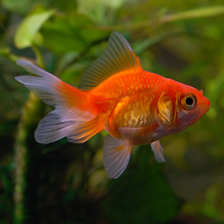

In [ ]:
ocean = Image.open("/content/goldfish.jpg").resize(IMAGE_SHAPE)
ocean

In [ ]:
ocean = np.array(ocean)/255.0
ocean.shape

(224, 224, 3)

In [ ]:
ocean[np.newaxis, ...]

array([[[[0.00392157, 0.00392157, 0.01176471],
         [0.00392157, 0.00392157, 0.01176471],
         [0.00392157, 0.00392157, 0.01176471],
         ...,
         [0.01568627, 0.1372549 , 0.28627451],
         [0.04705882, 0.18823529, 0.38039216],
         [0.04705882, 0.20784314, 0.4       ]],

        [[0.00392157, 0.00392157, 0.01176471],
         [0.00392157, 0.00392157, 0.01176471],
         [0.00392157, 0.00392157, 0.01176471],
         ...,
         [0.02352941, 0.14509804, 0.30196078],
         [0.0627451 , 0.21568627, 0.40392157],
         [0.0745098 , 0.23921569, 0.43529412]],

        [[0.00392157, 0.00392157, 0.01176471],
         [0.00392157, 0.00392157, 0.01176471],
         [0.00392157, 0.00392157, 0.01176471],
         ...,
         [0.02352941, 0.14901961, 0.31764706],
         [0.05882353, 0.22352941, 0.41960784],
         [0.06666667, 0.24705882, 0.44313725]],

        ...,

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784]

In [ ]:
result = classifier.predict(ocean[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels = []
with open("/content/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['\ufeffbackground', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15602874619_03fd934bed.jpg'),
 PosixPath('datasets/flower_photos/roses/19153732586_9de58c8f53_n.jpg')]

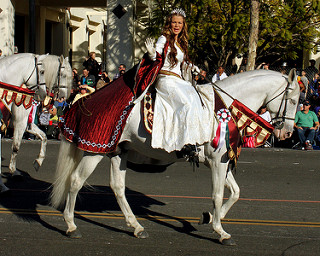

In [ ]:
Image.open(str(roses[1]))

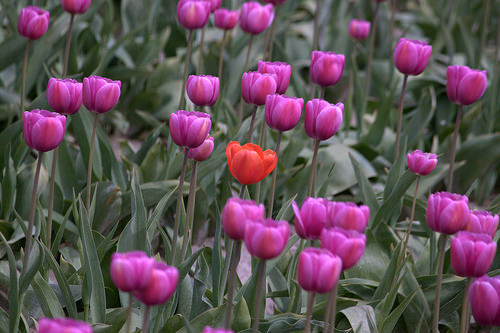

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15602874619_03fd934bed.jpg'),
 PosixPath('datasets/flower_photos/roses/19153732586_9de58c8f53_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 159, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

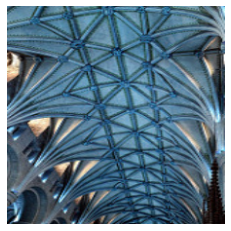

In [ ]:
plt.axis('off')
plt.imshow(X[0])

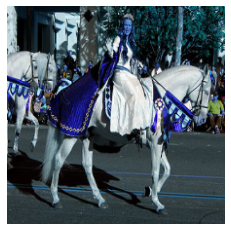

In [ ]:
plt.axis('off')
plt.imshow(X[1])

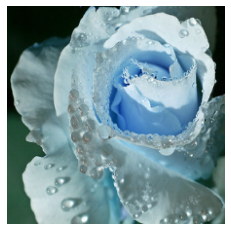

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([722, 795, 795])

In [ ]:
image_labels[795]

'shower curtain'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 65s 740ms/step - loss: 0.4213 - acc: 0.8503
Epoch 2/5
86/86 [==============================] - 64s 748ms/step - loss: 0.3048 - acc: 0.8943
Epoch 3/5
86/86 [==============================] - 64s 741ms/step - loss: 0.2547 - acc: 0.9179
Epoch 4/5
86/86 [==============================] - 64s 742ms/step - loss: 0.2131 - acc: 0.9357
Epoch 5/5
86/86 [==============================] - 64s 744ms/step - loss: 0.1862 - acc: 0.9469
